In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [17]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()

In [19]:
x = pd.DataFrame(iris['data'],columns=["sepal length in cm",
    "sepal width in cm"
    , "petal length in cm"
    , "petal width in cm"])

In [20]:
y = iris['target']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [22]:
param = {
   'criterion':['gini', 'entropy', 'log_loss'],
   'splitter': ['best', 'random'],
   'max_depth':[1,2,3,4,5],
   'max_features':['auto','sqrt','log2']
}

In [23]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=param,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [24]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [25]:
prediction = grid.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(confusion_matrix(prediction,y_test))
print(classification_report(prediction,y_test))
print(accuracy_score(prediction,y_test))

[[16  0  0]
 [ 0  5  1]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.83      0.91         6
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.94      0.95        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


### finding best tree and visualising

In [30]:
best_tree = grid.best_estimator_

[Text(0.5333333333333333, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.662\nsamples = 120\nvalue = [34, 45, 41]'),
 Text(0.4666666666666667, 0.75, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.6, 0.75, 'x[3] <= 1.75\ngini = 0.499\nsamples = 86\nvalue = [0, 45, 41]'),
 Text(0.5666666666666667, 0.8333333333333333, '  False'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[3] <= 1.55\ngini = 0.153\nsamples = 48\nvalue = [0, 44, 4]'),
 Text(0.13333333333333333, 0.4166666666666667, 'x[3] <= 1.35\ngini = 0.089\nsamples = 43\nvalue = [0, 41, 2]'),
 Text(0.06666666666666667, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [0, 27, 0]'),
 Text(0.2, 0.25, 'x[0] <= 6.2\ngini = 0.219\nsamples = 16\nvalue = [0, 14, 2]'),
 Text(0.13333333333333333, 0.08333333333333333, 'gini = 0.408\nsamples = 7\nvalue = [0, 5, 2]'),
 Text(0.26666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 9\nvalue = [0, 9, 0]'),
 Text(0.5333333333333333, 0.4166666666666667,

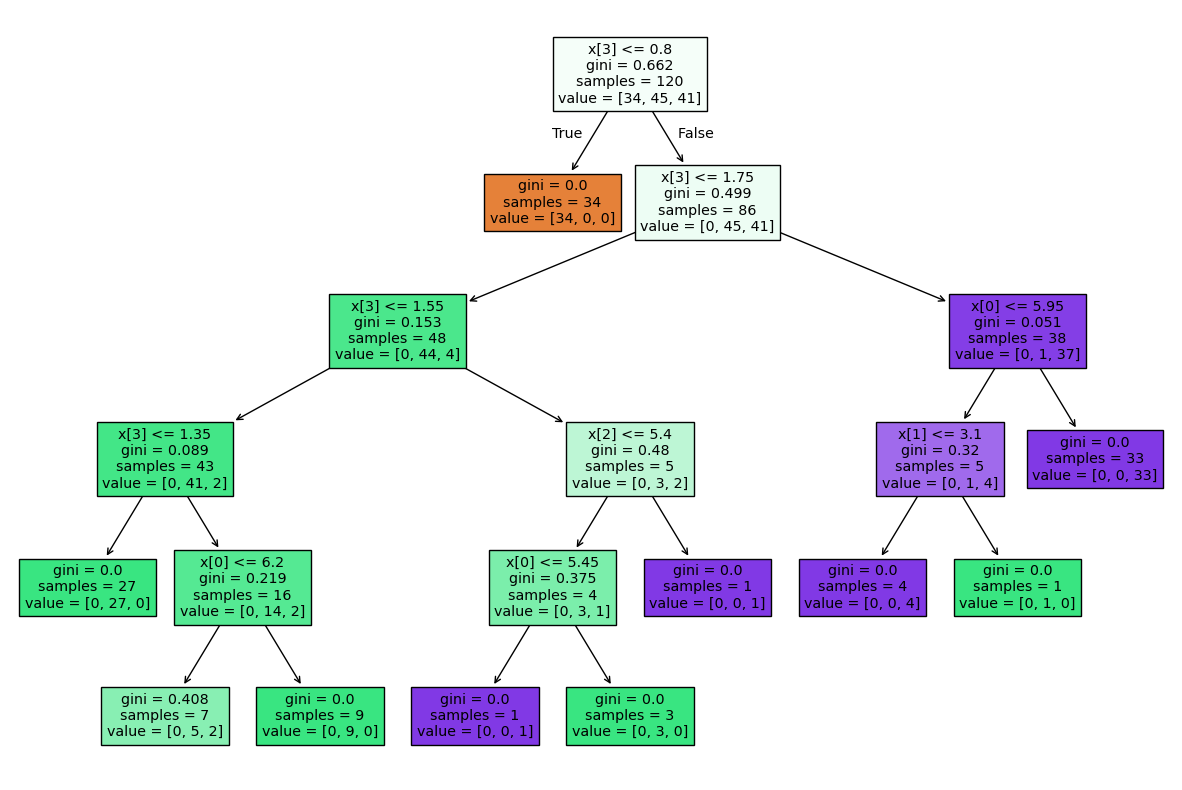

In [31]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_tree,filled=True)